In [154]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [155]:
data = pd.read_csv('nt-1012.csv',header=0)
data.head()
list(data)
print (data.shape)

(30000, 26)


In [156]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,PAY_5,PAY_4,...,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,TARGET
0,0,1,20000,2,2,1,24,1,1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,1,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [157]:
# one hot encoding
df1 = pd.get_dummies(data.SEX)
df1.rename(columns = {1:'Male',2:'Female'}, inplace = True)
df2 = pd.get_dummies(data.MARRIAGE)
df2.rename(columns = {1:'Married',2:'Single',3:'Others'}, inplace = True)
df3 = pd.get_dummies(data.EDUCATION)
df3.rename(columns = {1:'GS',2:'HS',3:'Univ',4:'Other'}, inplace = True)
data = pd.concat([data,df1,df2,df3], axis = 1)
data.drop(labels=['SEX','MARRIAGE','EDUCATION'], axis =1, inplace = True)

In [158]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [159]:
print (list(data))

['ID', 'LIMIT_BAL', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'TARGET', 'Male', 'Female', 0, 'Married', 'Single', 'GS', 'HS', 'Univ', 'Other']


In [160]:
#data['TOTAL_MONTHS_DELAYED'] = data['PAY_1'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6'] 
#data['TOTAL_BILL_AMT'] = data['BILL_AMT6'] + data['BILL_AMT5'] + data['BILL_AMT4'] + data['BILL_AMT3'] + data['BILL_AMT2'] + data['BILL_AMT1']
#data['TOTAL_PAIED_AMT'] = data['PAY_AMT6'] + data['PAY_AMT5'] + data['PAY_AMT4'] + data['PAY_AMT3'] + data['PAY_AMT2'] + data['PAY_AMT1']

In [161]:
print (data['TARGET'].value_counts())
print (list(data))

0    23364
1     6636
Name: TARGET, dtype: int64
['ID', 'LIMIT_BAL', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'TARGET', 'Male', 'Female', 0, 'Married', 'Single', 'GS', 'HS', 'Univ', 'Other']


In [162]:
X = data.iloc[:, data.columns != 'TARGET']
y = data.iloc[:, data.columns == 'TARGET']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [164]:
print("Original number transactions train dataset: ", len(X_train))
print("Original number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))


('Original number transactions train dataset: ', 21000)
('Original number transactions test dataset: ', 9000)
('Total number of transactions: ', 30000)


In [165]:
print(type(y_train))
print(type(y_test))
print(type(X_train))
print(type(X_test))
unique_train, counts_train = np.unique(y_train, return_counts=True)
print (dict(zip(unique_train, counts_train)))
unique_test, counts_test = np.unique(y_test, return_counts=True)
print (dict(zip(unique_test, counts_test)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{0: 16304, 1: 4696}
{0: 7060, 1: 1940}


In [166]:
# Number of data points in the minority class
number_records_default = len(data[data.TARGET == 1])
print ("Number of records default : ", number_records_default)
default_indices = np.array(data[data.TARGET == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.TARGET == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_default, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([default_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'TARGET']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'TARGET']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.TARGET == 0])/float(len(under_sample_data)))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.TARGET == 1])/float(len(under_sample_data)))
print("Total number of transactions in resampled data: ", len(under_sample_data))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

('Number of records default : ', 6636)
('Percentage of normal transactions: ', 0.5)
('Percentage of fraud transactions: ', 0.5)
('Total number of transactions in resampled data: ', 13272)

('Number transactions train dataset: ', 9290)
('Number transactions test dataset: ', 3982)
('Total number of transactions: ', 13272)


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [180]:
def printing_Kfold_scores(x_train_data,y_train_data,algo,c_param_range):
    fold = KFold(len(y_train_data),5,shuffle=False) 
    print (fold)
    # Different C parameters

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('Hyper parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            if algo == "DTC":
                lr = DecisionTreeClassifier(max_depth= c_param)
            elif algo == "RFC":
                lr = RandomForestClassifier(n_estimators= 26,max_depth=c_param)
            elif algo == "LR":
                lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = pd.DataFrame(lr.predict_proba(x_train_data.iloc[indices[1],:].values))[1]

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
           # recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_acc = roc_auc_score(y_train_data.iloc[indices[1],:],y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with Hyper parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [183]:
#c_param_range = [0.01,0.1,1,10,100]
c_param_range = [7,8,9,11,12]
algo = "RFC"
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample,algo,c_param_range)

sklearn.cross_validation.KFold(n=9290, n_folds=5, shuffle=False, random_state=None)
-------------------------------------------
('Hyper parameter: ', 7)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.77137858115350078)
('Iteration ', 2, ': recall score = ', 0.77287755527743007)
('Iteration ', 3, ': recall score = ', 0.78514129517876841)
('Iteration ', 4, ': recall score = ', 0.77012508157367943)
('Iteration ', 5, ': recall score = ', 0.7775855473640283)

('Mean recall score ', 0.77542161210948135)

-------------------------------------------
('Hyper parameter: ', 8)
-------------------------------------------



C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Iteration ', 1, ': recall score = ', 0.77537962399698723)
('Iteration ', 2, ': recall score = ', 0.77222106336624496)
('Iteration ', 3, ': recall score = ', 0.77817097249645428)
('Iteration ', 4, ': recall score = ', 0.76897928289346318)
('Iteration ', 5, ': recall score = ', 0.77602529327212877)

('Mean recall score ', 0.77415524720505569)

-------------------------------------------
('Hyper parameter: ', 9)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.77396715043017306)
('Iteration ', 2, ': recall score = ', 0.7750127474157511)
('Iteration ', 3, ': recall score = ', 0.7873318687023183)
('Iteration ', 4, ': recall score = ', 0.77164875619699147)
('Iteration ', 5, ': recall score = ', 0.77325485695738849)

('Mean recall score ', 0.77624307594052444)

-------------------------------------------
('Hyper parameter: ', 11)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.77606558326815567)
('Iteration ', 2, ': 

('the recall for this model is :', 0.6256463288521199)
('TP', 1210)
('TN', 1589)
('FP', 459)
('FN', 724)


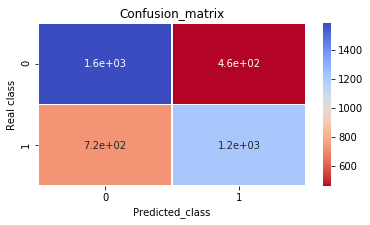

In [184]:
#lr = LogisticRegression(C = best_c, penalty = 'l1') # l2 is about 90% recall
lr = lr = RandomForestClassifier(n_estimators= 26,max_depth=9)
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)


# Compute and plot confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
print("the recall for this model is :",cnf_matrix[1,1]/float((cnf_matrix[1,1]+cnf_matrix[1,0])))
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

('the recall for this model is :', 0.65206185567010311)
('Accuracy for this model is :', 0.755)
('TP', 1265)
('TN', 5530)
('FP', 1530)
('FN', 675)


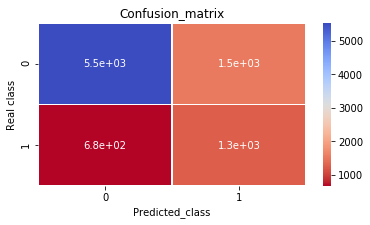

In [177]:
# Use this C_parameter to build the model with the sampling dataset and predict the classes in the whole test dataset
#lr = LogisticRegression(C = best_c, penalty = 'l1')
lr = lr = RandomForestClassifier(n_estimators= 26,max_depth=6)
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test)

# Compute and plot confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)

print("the recall for this model is :",cnf_matrix[1,1]/float((cnf_matrix[1,1]+cnf_matrix[1,0])))
print ("Accuracy for this model is :", accuracy_score(y_test,y_pred))
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [179]:
lr = lr = RandomForestClassifier(n_estimators= 26,max_depth=9)
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = pd.DataFrame(lr.predict_proba(X_test))[1]
roc=roc_auc_score(y_test,y_pred)
print (roc)

0.784585913087
